The A(+) Team 

Team Members (in order of importance): Hamza, Ayca, Rena 

Date: February 2021 

In [1]:
#Initial imports 

import pandas as pd 
import numpy as np 
import datetime as dt 

%matplotlib inline


In [69]:
#Read in and clean the data

#Read in Bitcoin Data 

btc_df = pd.read_csv("BTC-USD.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
btc_df = btc_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns 
btc_df = btc_df.rename(columns={'Close':'BTC'}) #rename close column to BTC

#Read in Ethereum Data 
eth_df = pd.read_csv("ETH-USD.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
eth_df = eth_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns 
eth_df = eth_df.rename(columns={'Close':'ETH'}) #rename close column to ETH

#Read in Gold Futures Prices 
gold_df = pd.read_csv("Gold Futures Prices.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
gold_df = gold_df.drop(columns=["Vol.", "Open", "High", "Low", "Change %"]) #Keep relevant columns 
gold_df = gold_df.rename(columns={'Price':'GOLD'}) #rename close column to GOLD

#Read in Dow Jones Data 
dj_df = pd.read_csv("Dow Jones Historical Data.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
dj_df = dj_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns
dj_df = dj_df.rename(columns={'Close':'DOW'}) #rename close column to Dow

#Read in Brazilian index Data 
brz_df = pd.read_csv("Brazilian Index Prices.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
brz_df = brz_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"]) #Keep relevant columns
brz_df = brz_df.rename(columns={'Close':'BRZ'}) #rename close column to Brazil
                              
#Read in Ressel 2000 Index 
r2000_df = pd.read_csv("Russel 2000 Index .csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
r2000_df = r2000_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])#Keep relevant columns
r2000_df = r2000_df.rename(columns={'Close':'R2000'}) #rename close column to R2000

#Read in TSX Data 
tsx_df = pd.read_csv("TSX Historical Data.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
tsx_df = tsx_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])#Keep relevant columns
tsx_df = tsx_df.rename(columns={'Close':'TSX'}) #rename close column to TSX

#Read in S&P 500 Data 
sp500_df = pd.read_csv("S_P 500.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df = sp500_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])#Keep relevant columns
sp500_df = sp500_df.rename(columns={'Close':'SP500'}) #rename close column to sp500

In [70]:
#Concatenate Data

combined_df = pd.concat([btc_df, eth_df, gold_df, dj_df, brz_df, r2000_df, tsx_df, sp500_df],axis="columns", join="inner")
combined_df.dtypes

BTC      float64
ETH      float64
GOLD      object
DOW      float64
BRZ      float64
R2000    float64
TSX      float64
SP500    float64
dtype: object

In [71]:
#Change Data type of "Gold" to float instead of object 

combined_df['GOLD'] = combined_df['GOLD'].str.replace(',', '')
combined_df['GOLD'] = combined_df['GOLD'].astype('float')



In [77]:
#Calculate daily returns 

combined_returns = combined_df.pct_change().dropna()


<AxesSubplot:title={'center':'Daily returns'}, xlabel='Date'>

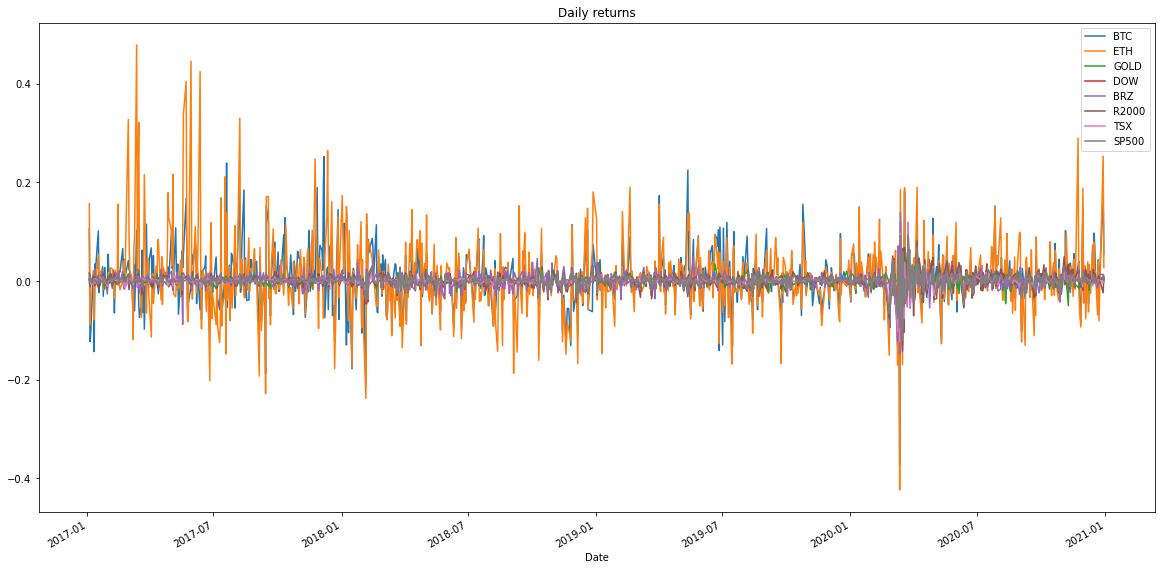

In [78]:
#Plot Daily returns 

combined_returns.plot(figsize=(20,10), title = "Daily returns")

In [79]:
#Calculate cumulative returns of all portfolios 

cumulative_returns = (1 + combined_returns).cumprod() 
cumulative_returns

,BTC,ETH,GOLD,DOW,BRZ,R2000,TSX,SP500
Date,,,,,,,,
2017-01-04,1.106233,1.156947,1.001928,1.003038,0.996360,1.016448,1.007388,1.005722
2017-01-05,0.970819,1.054410,1.013979,1.000882,1.004158,1.004724,1.011920,1.004947
2017-01-06,0.864310,1.054441,1.008837,1.004126,0.997590,1.001311,1.006044,1.008482
2017-01-09,0.864910,1.061731,1.018398,1.000283,0.998156,0.994141,0.999091,1.004903
2017-01-10,0.869558,1.084764,1.019121,0.998681,1.005144,1.003962,1.001513,1.004903
...,...,...,...,...,...,...,...,...
2020-12-21,21.845381,62.704596,1.512654,1.519808,1.876856,1.442947,1.136201,1.636492
2020-12-22,22.784172,65.278958,1.502611,1.509701,1.882227,1.457264,1.139551,1.633099
2020-12-23,22.265238,60.020524,1.508878,1.515451,1.906639,1.469875,1.142219,1.634317


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

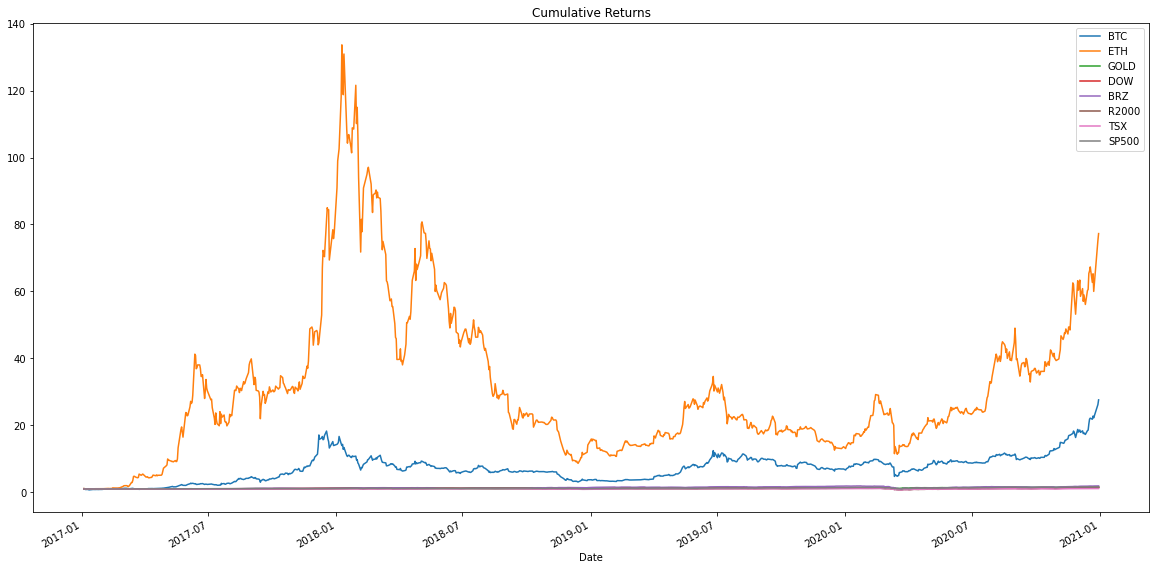

In [80]:
#Plot cumulative returns 

cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

<AxesSubplot:>

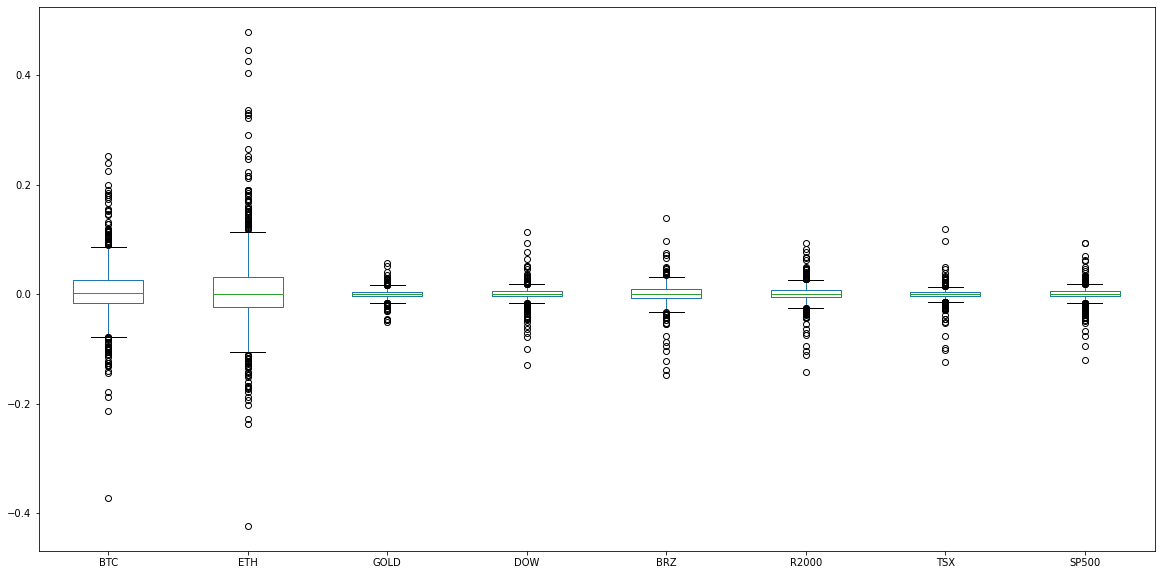

In [81]:
#Create Box Plot to show risk

combined_returns.plot.box(figsize=(20,10))

In [82]:
#Calculate Correlation 
correlation = combined_returns.corr()


<AxesSubplot:>

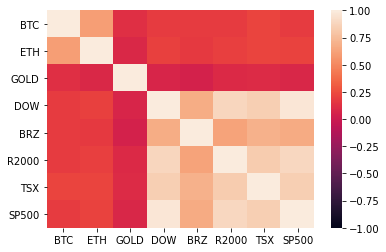

In [83]:
#Display the correlation matrix 

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)